##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data set

In [ ]:
dataset = pd.read_csv('Dataset 1.csv')
X = dataset[['x', 'y']].values

##Data Visualization

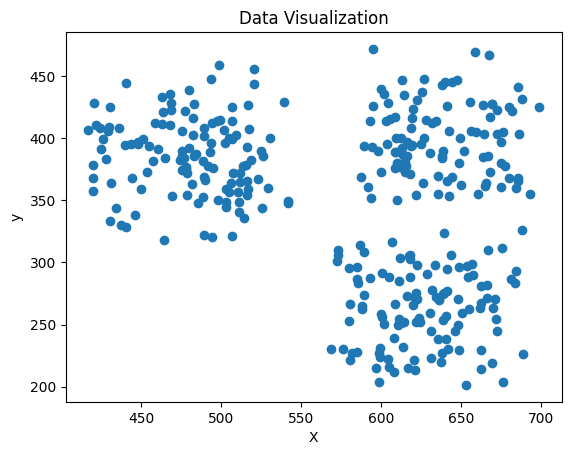

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Visualization')
plt.show()

##K-Mean Clustering using Eucledian distance

In [ ]:

# Function to calculate the Euclidean distance between two points in space
def euclidean_distance(point1, point2):
    # Sum the squared differences between corresponding coordinates, then take the square root
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Class definition for the KMeans clustering algorithm
class KMeans:
    # Initialize the KMeans model with specified parameters
    def __init__(self, k, max_iters=100, tolerance=1e-4):
        # k is the number of clusters
        self.k = k
        # max_iters is the maximum number of iterations to run the algorithm
        self.max_iters = max_iters
        # tolerance is the convergence threshold for centroid movement
        self.tolerance = tolerance
        # centroids will store the current centroids of the clusters
        self.centroids = None

    # Method to randomly initialize centroids from the data points
    def initialize_centroids(self, X):
        np.random.seed(42)  # Ensure reproducibility
        # Randomly choose k data points to serve as initial centroids
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

    # Method to assign each data point to the nearest centroid
    def assign_clusters(self, X):
        clusters = []  # List to store the assigned cluster of each point
        for point in X:
            # Calculate the distance of the point to each centroid
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            # Find the index of the closest centroid
            closest_centroid = np.argmin(distances)
            # Assign this point to the closest centroid's cluster
            clusters.append(closest_centroid)
        return np.array(clusters)  # Return clusters as a numpy array

    # Method to update centroids based on the mean of points in each cluster
    def update_centroids(self, X, clusters):
        new_centroids = np.zeros((self.k, X.shape[1]))  # Array to store the updated centroids
        for i in range(self.k):
            # Get all points assigned to the current cluster
            points_in_cluster = X[clusters == i]
            if len(points_in_cluster) > 0:  # Avoid division by zero
                # Update centroid as the mean of points in the cluster
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
        return new_centroids

    # Main method to run the KMeans algorithm
    def fit(self, X):
        self.initialize_centroids(X)  # Start with random centroids
        iteration_count = 0  # Counter to keep track of iterations
        
        for iteration in range(self.max_iters):
            iteration_count += 1  # Increment iteration count

            # Step 1: Assign each point to the nearest centroid
            clusters = self.assign_clusters(X)

            # Step 2: Update centroids by taking the mean of assigned points
            new_centroids = self.update_centroids(X, clusters)

            # Step 3: Calculate the error as the total shift of centroids
            error = np.sum([euclidean_distance(new_centroids[i], self.centroids[i]) for i in range(self.k)])

            # Display the current state of centroids and error for this iteration
            print(f"Iteration {iteration + 1}, Centroids:\n{new_centroids}\nError: {error}")
            print("******************************")

            # Step 4: Check for convergence based on tolerance
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                print("Convergence reached.")
                break  # Stop if centroids have stopped moving significantly

            # Update centroids for the next iteration
            self.centroids = new_centroids

        # Print the total number of iterations performed
        print(f"Total iterations performed: {iteration_count}")
        return clusters, self.centroids  # Return the final clusters and centroids


##Fitting the Model with K=2

In [ ]:
kmeans_2 = KMeans(k=2)
clusters_2, centroids_2 = kmeans_2.fit(X)
print(f'Centroids: {centroids_2}')
print('No of Centroids:', len(centroids_2))

Iteration 1, Centroids:
[[436.85009836 397.06266565]
 [590.35384506 344.47242345]]
Error: 137.1438861887892
******************************
Iteration 2, Centroids:
[[473.29706955 389.32879568]
 [622.99435675 331.18877832]]
Error: 72.49849058595521
******************************
Iteration 3, Centroids:
[[480.60429976 385.44506433]
 [631.4147117  328.50696986]]
Error: 17.112310659806475
******************************
Iteration 4, Centroids:
[[481.53950939 386.15485318]
 [631.58627636 327.83625802]]
Error: 1.8663670327804245
******************************
Iteration 5, Centroids:
[[481.53950939 386.15485318]
 [631.58627636 327.83625802]]
Error: 0.0
******************************
Convergence reached.
Total iterations performed: 5
Centroids: [[481.53950939 386.15485318]
 [631.58627636 327.83625802]]
No of Centroids: 2


##Function for Plotting Clusters and their Boundaries

In [ ]:
def plot_clusters_with_boundaries(X, clusters, centroids, k, model):
    plt.figure(figsize=(16, 9))

    # Defining the x and y range for the plot by expanding slightly beyond min and max values of X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Creating a mesh grid over the defined x and y ranges with a step size of 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),    # This will help in plotting decision boundaries
                         np.arange(y_min, y_max, 0.1))

    # For each point in the mesh grid,we predict the cluster it belongs to using the model
    # This will allow us to visualize the boundaries of each cluster
    Z = np.array([model.assign_clusters(np.array([[x, y]])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)  # Reshape Z to match the grid shape 

    # Use a filled contour plot to shade the regions based on cluster assignment
    # The color of each region corresponds to a cluster
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plotting each cluster's data points with a unique color and add a label for each
    for i in range(k):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=50, label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
    plt.title(f'K-Means Clustering with k={k} and Cluster Boundaries')
    plt.xlabel('X')  # Label for x-axis
    plt.ylabel('Y')  # Label for y-axis
    plt.legend()
    plt.show()


##Cluster Visualization for K=2

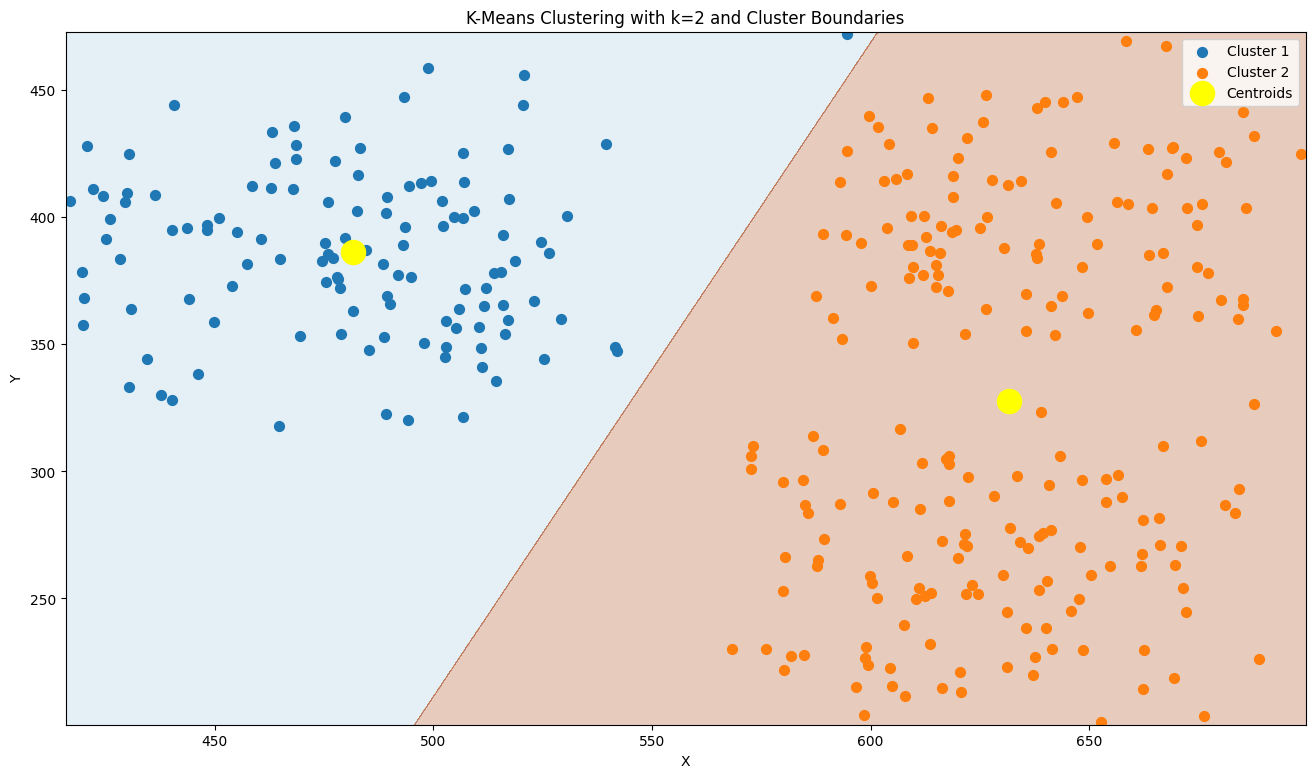

In [ ]:
plot_clusters_with_boundaries(X, clusters_2, centroids_2, 2, kmeans_2)

##Model Fitting with K=3

In [ ]:
kmeans_3 = KMeans(k=3)
clusters_3, centroids_3 = kmeans_3.fit(X)
print(f'Centroids: {centroids_3}')
print('No of Centroids:', len(centroids_3))

Iteration 1, Centroids:
[[436.85009836 397.06266565]
 [495.47491713 382.75349231]
 [631.58627636 327.83625802]]
Error: 82.80811926383538
******************************
Iteration 2, Centroids:
[[442.04914063 392.26027523]
 [500.8031039  383.17659852]
 [631.58627636 327.83625802]]
Error: 12.422600050682714
******************************
Iteration 3, Centroids:
[[442.60792294 392.05299378]
 [503.55657298 384.36866053]
 [631.9111457  326.84471573]]
Error: 4.639829315249871
******************************
Iteration 4, Centroids:
[[442.60792294 392.05299378]
 [505.76388003 385.31919545]
 [632.24013639 325.91212831]]
Error: 3.3921886370292067
******************************
Iteration 5, Centroids:
[[445.2040844  390.52420341]
 [507.44038081 385.83599018]
 [632.24013639 325.91212831]]
Error: 4.767194706875108
******************************
Iteration 6, Centroids:
[[447.74496981 391.25330835]
 [511.57686975 386.4628234 ]
 [632.46734161 324.83594301]]
Error: 7.927045898419569
*********************

##Cluster Visualization for K=3

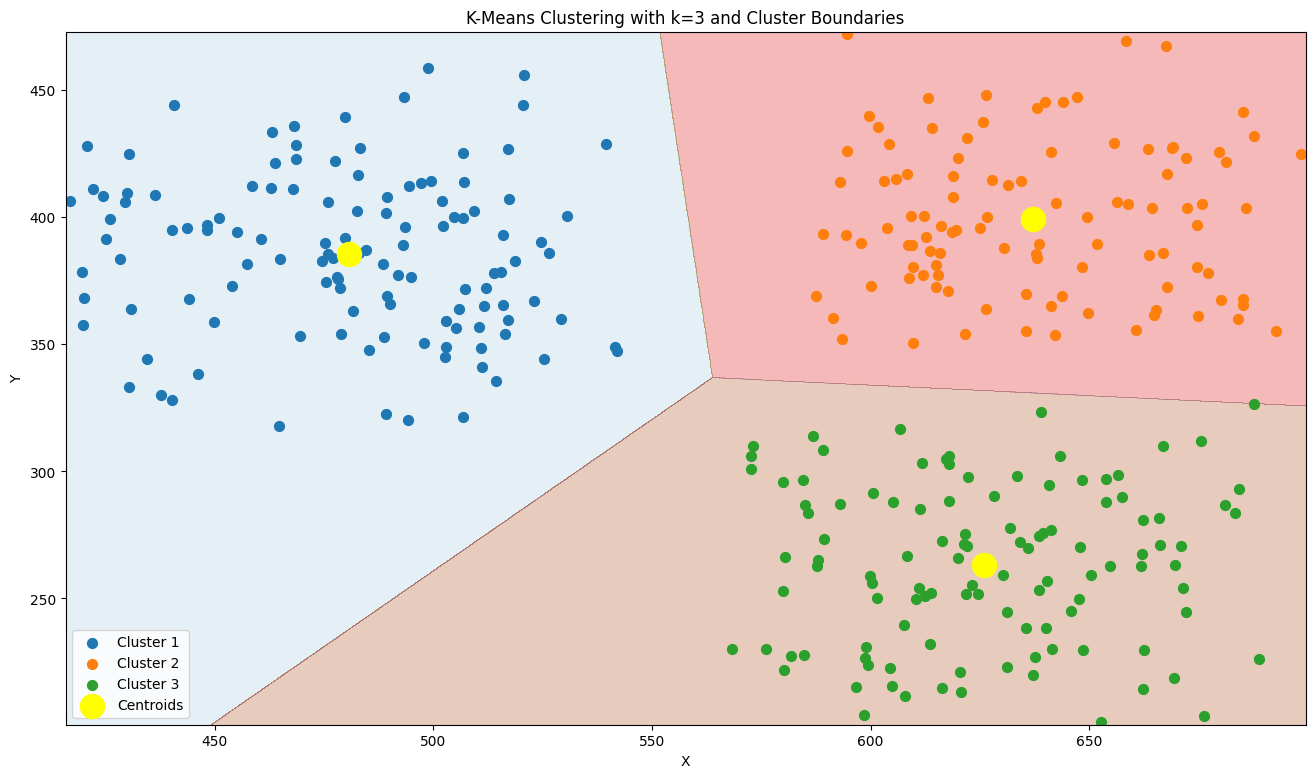

In [ ]:
plot_clusters_with_boundaries(X, clusters_3, centroids_3, 3, kmeans_3)

##Finding Optimal No of Clusters for K-means using Elbow Method in comparing k=2 vs k=3


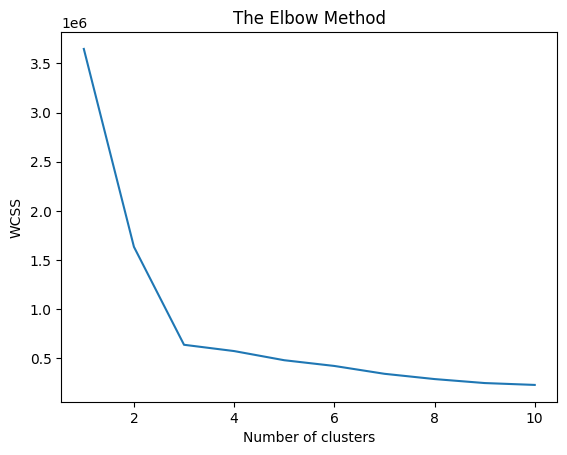

The optimal number of clusters is: 3


In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store the Within-Cluster Sum of Squares (WCSS) for different cluster counts
wcss = []

# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Create a KMeans clustering model with 'i' clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # Append the inertia (WCSS) to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters')  
plt.ylabel('WCSS')  
plt.show() 

# Function to find the optimal number of clusters using the elbow method
def find_optimal_clusters(wcss):
    # Define points for the line segment from the first to the last WCSS value
    x1, y1 = 1, wcss[0]
    x2, y2 = len(wcss), wcss[-1]

    # List to store distances from each point to the line segment
    distances = []
    
    # Calculate the distance from each point in WCSS to the line segment
    for i in range(len(wcss)):
        x0, y0 = i + 1, wcss[i]  # Current point (x0, y0)
        
        # Calculate the numerator of the distance formula
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        # Calculate the denominator of the distance formula
        denominator = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        
        # Append the calculated distance to the distances list
        distances.append(numerator / denominator)

    # Return the index of the maximum distance, which indicates the optimal number of clusters
    return distances.index(max(distances)) + 1

# Find and print the optimal number of clusters
optimal_clusters = find_optimal_clusters(wcss)
print(f"The optimal number of clusters is: {optimal_clusters}")
